![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [49]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [3]:
# 1.
df = pd.read_csv('datasets_beers.csv')

# 2.
df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
# 3.
df.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

In [5]:
# 4.
df.shape

(2410, 8)

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [7]:
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [8]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Filas: 2410
Columnas: 7


## Ejercicio 5
¿De qué tipo son los datos?

In [9]:
df.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numércias: mean, max, count, cuantiles...

In [10]:
df.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [21]:
df['style'].unique()

array(['American Pale Lager', 'American Pale Ale (APA)', 'American IPA',
       'American Double / Imperial IPA', 'Oatmeal Stout',
       'American Porter', 'Saison / Farmhouse Ale', 'Belgian IPA',
       'Cider', 'Baltic Porter', 'Tripel', 'American Barleywine',
       'Winter Warmer', 'American Stout', 'Fruit / Vegetable Beer',
       'English Strong Ale', 'American Black Ale', 'Belgian Dark Ale',
       'American Blonde Ale', 'American Amber / Red Ale',
       'Berliner Weissbier', 'American Brown Ale',
       'American Pale Wheat Ale', 'Belgian Strong Dark Ale', 'Kölsch',
       'English Pale Ale', 'American Amber / Red Lager',
       'English Barleywine', 'Milk / Sweet Stout', 'German Pilsener',
       'Pumpkin Ale', 'Belgian Pale Ale', 'American Pilsner',
       'American Wild Ale', 'English Brown Ale', 'Altbier',
       'California Common / Steam Beer', 'Gose', 'Cream Ale',
       'Vienna Lager', 'Witbier', 'American Double / Imperial Stout',
       'Munich Helles Lager', 'Schwa

In [19]:
df.groupby('style')['name'].count().sort_values(ascending = False)

style
American IPA                           424
American Pale Ale (APA)                245
American Amber / Red Ale               133
American Blonde Ale                    108
American Double / Imperial IPA         105
American Pale Wheat Ale                 97
American Brown Ale                      70
American Porter                         68
Saison / Farmhouse Ale                  52
Witbier                                 51
Fruit / Vegetable Beer                  49
Kölsch                                  42
Hefeweizen                              40
American Pale Lager                     39
American Stout                          39
Cider                                   37
American Black Ale                      36
German Pilsener                         36
Märzen / Oktoberfest                    30
American Amber / Red Lager              29
Cream Ale                               29
Czech Pilsener                          28
American Pilsner                        25
Belgi

In [17]:
df['style'].value_counts()

American IPA                           424
American Pale Ale (APA)                245
American Amber / Red Ale               133
American Blonde Ale                    108
American Double / Imperial IPA         105
American Pale Wheat Ale                 97
American Brown Ale                      70
American Porter                         68
Saison / Farmhouse Ale                  52
Witbier                                 51
Fruit / Vegetable Beer                  49
Kölsch                                  42
Hefeweizen                              40
American Pale Lager                     39
American Stout                          39
Cider                                   37
German Pilsener                         36
American Black Ale                      36
Märzen / Oktoberfest                    30
American Amber / Red Lager              29
Cream Ale                               29
Czech Pilsener                          28
American Pilsner                        25
Belgian Pal

In [18]:
len(df['style'].value_counts())

99

In [25]:
df[df.isnull()['style']]

,abv,ibu,id,name,style,brewery_id,ounces
566,NaN,NaN,2210,Special Release,NaN,29,16.0
853,0.060,21.0,1635,Kilt Lifter Scottish-Style Ale,NaN,160,12.0
866,0.053,27.0,2527,OktoberFiesta,NaN,66,12.0
1554,NaN,NaN,1796,The CROWLER™,NaN,166,32.0
1555,NaN,NaN,1790,CAN'D AID Foundation,NaN,166,12.0


In [ ]:
# Para que imprima por pantalla hasta 500 filas
pd.set_option("display.max_rows", 500)

## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [30]:
df.iloc[10:21]

,abv,ibu,id,name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [31]:
df[10:21]

,abv,ibu,id,name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [32]:
df.loc[10:21, 'name':'ounces']

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [34]:
df.iloc[10:21][['abv', 'ibu', 'ounces']]

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


In [35]:
df.iloc[10:21][['abv', 'ibu', 'ounces']].values

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [37]:
df['ounces'].sum()

32757.3

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [40]:
print(round(df['ibu'].mean(),2))
print(df['ibu'].min())
print(df['ibu'].max())

42.71
4.0
138.0


In [42]:
df[df['ibu'] == df['ibu'].max()]

,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [43]:
df[df['ibu'] == df['ibu'].min()]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [45]:
print(df['ibu'].var())
print(df['ibu'].std())

673.6135373259932
25.954065911259324


In [46]:
print(df['ibu'].mean())

42.71316725978647


## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

In [47]:
df.corr()

,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.670621,0.042811,-0.098632,0.172529
ibu,0.670621,1.000000,0.000485,-0.004875,0.054691
id,0.042811,0.000485,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.004875,-0.504030,1.000000,-0.133762
ounces,0.172529,0.054691,0.100843,-0.133762,1.000000


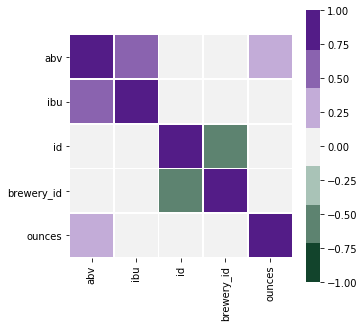

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5)

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

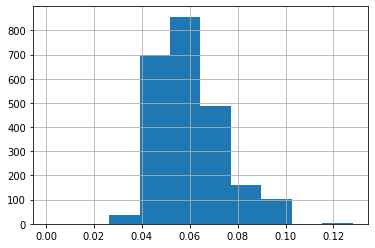

In [52]:
df['abv'].hist()

In [53]:
df['abv'].skew()

0.9584771340361395

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

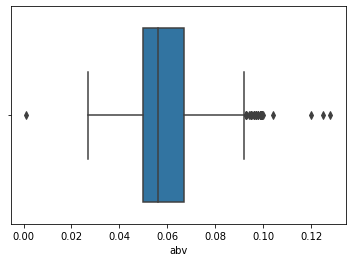

In [54]:
sns.boxplot(x = 'abv', data = df)

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [57]:
df.groupby('style')['abv'].mean().sort_values(ascending = False).head()

style
English Barleywine        0.107667
Quadrupel (Quad)          0.104000
American Barleywine       0.099000
American Malt Liquor      0.099000
Russian Imperial Stout    0.097636
Name: abv, dtype: float64

In [58]:
df.groupby('style')['ibu'].mean().sort_values(ascending = False).head()

style
American Barleywine                   96.00
American Double / Imperial IPA        93.32
Russian Imperial Stout                86.50
American Double / Imperial Pilsner    85.00
Belgian Strong Dark Ale               72.00
Name: ibu, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [59]:
df2 = pd.read_csv("datasets_breweries.csv")
df2.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [60]:
df2 = df2.rename(columns={"Unnamed: 0": "brewery_id",
                          "name": "brewery_name"})

In [61]:
df2.head()

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 18
Junta los dos datasets que tienes

In [62]:
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [63]:
df3 = df.merge(df2, on='brewery_id')
df3.head()

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas vervecerías hay?

In [69]:
print(len(df3['state'].unique()))
print(len(df3['city'].unique()))
print(len(df3['brewery_id'].unique()))
print(len(df3['brewery_name'].unique()))

51
384
558
551


## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [70]:
df3.groupby(['state', 'city']).aggregate(['mean', 'median', 'max'])['abv']

mean  median    max
state city                                        
 AK   Anchorage            0.054200  0.0520  0.063
      Juneau               0.053000  0.0530  0.053
      Soldotna             0.058500  0.0580  0.068
      Talkeetna            0.059500  0.0585  0.065
 AL   Birmingham           0.065400  0.0600  0.093
      Gadsden              0.060000  0.0600  0.060
      Huntsville           0.057667  0.0510  0.072
 AR   Rogers               0.040000  0.0400  0.040
      Springdale           0.055000  0.0545  0.061
 AZ   Chandler             0.063158  0.0550  0.095
      Flagstaff            0.055200  0.0540  0.061
      Lake Havasu City     0.066167  0.0650  0.085
      Phoenix              0.061000  0.0610  0.061
      Prescott                  NaN     NaN    NaN
      Tempe                0.054857  0.0520  0.067
      Tucson               0.058667  0.0600  0.071
      Williams             0.052000  0.0520  0.054
 CA   Belmont              0.066333  0.0710  0.074
      Boonville            0.056889  0.0570  0.070
      Buellton             0.049333  0.0480  0.055
      Carlsbad             0.054500  0.0525  0.068
      Chico                0.058444  0.0560  0.072
      Claremont            0.067000  0.0670  0.067
      Diamond Springs      0.050000  0.0500  0.050
      Half Moon Bay        0.037000  0.0370  0.037
      Los Angeles          0.065333  0.0590  0.094
      Mammoth Lakes        0.048500  0.0435  0.065
      Mill Valley          0.075333  0.0760  0.088
      Paso Robles          0.053400  0.0470  0.075
      Redlands             0.044500  0.0445  0.046
      Sacramento           0.061200  0.0560  0.073
      San Diego            0.061762  0.0580  0.099
      San Francisco        0.063438  0.0610  0.099
      San Luis Obispo      0.073250  0.0735  0.095
      Santa Cruz           0.064778  0.0700  0.089
      Santee               0.080000  0.0800  0.099
      South San Francisco  0.052000  0.0520  0.052
      Temecula             0.055600  0.0500  0.075
      Torrance             0.065000  0.0550  0.099
      Ukiah                0.055000  0.0550  0.055
      Vista                0.052000  0.0520  0.052
 CO   Arvada               0.061286  0.0510  0.092
      Aspen                0.063000  0.0630  0.070
      Aurora               0.058000  0.0615  0.066
      Boulder              0.068049  0.0670  0.128
      Broomfield           0.071000  0.0740  0.095
      Buena Vista          0.059429  0.0550  0.078
      Colorado Springs     0.052000  0.0520  0.052
      Denver               0.063250  0.0615  0.099
      Dillon               0.060000  0.0590  0.069
      Dolores                   NaN     NaN    NaN
      Durango              0.060000  0.0580  0.080
      Eagle                0.056684  0.0560  0.075
      Edwards              0.056667  0.0520  0.075
      Fort Collins         0.052227  0.0520  0.065
      Golden               0.055000  0.0550  0.055
      Greeley              0.066667  0.0750  0.077
      Idaho Springs        0.064000  0.0640  0.073
      Lone Tree            0.057000  0.0570  0.057
      Longmont             0.073897  0.0800  0.099
      Loveland             0.063000  0.0630  0.063
      Lyons                0.076154  0.0800  0.099
      Monument             0.066333  0.0700  0.073
      Palisade             0.050500  0.0505  0.053
      Paonia               0.057000  0.0590  0.064
      Silverton            0.056667  0.0600  0.068
      Telluride            0.058667  0.0570  0.064
      Windsor              0.066500  0.0665  0.070
 CT   Bloomfield           0.061000  0.0555  0.086
      East Windsor         0.061000  0.0610  0.061
      Pawcatuck            0.038000  0.0380  0.038
      Stamford             0.061000  0.0610  0.070
      Stratford            0.056000  0.0500  0.072
      Wolcott              0.068000  0.0680  0.068
      Woodbridge           0.064909  0.0620  0.090
 DC   Washington           0.065625  0.0625  0.092
 DE   Greenville           0.055000  0.0550  0.055
  

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [72]:
df3['state'].unique()

array([' OR', ' IN', ' CA', ' FL', ' MO', ' WA', ' CO', ' LA', ' KY',
       ' AK', ' WI', ' OH', ' OK', ' NC', ' MI', ' TX', ' CT', ' AL',
       ' MA', ' AZ', ' MN', ' ME', ' VA', ' IL', ' TN', ' MT', ' WY',
       ' NE', ' NY', ' UT', ' NJ', ' PA', ' NV', ' SC', ' GA', ' RI',
       ' IA', ' AR', ' ID', ' SD', ' DC', ' KS', ' ND', ' VT', ' MD',
       ' WV', ' HI', ' DE', ' NM', ' MS', ' NH'], dtype=object)

In [75]:
bitter = df3[df3['state'] == ' IN']
bitter.sort_values(['ibu'], ascending = False)[['name', 'ibu', 'state']]

,name,ibu,state
479,Hopkick Dropkick,115.0,IN
2191,Overlord Imperial IPA,115.0,IN
811,Half Cycle IPA,104.0,IN
2062,Isis,91.0,IN
2189,Csar,90.0,IN
850,The Gadget,90.0,IN
483,3:33 Black IPA,86.0,IN
1623,Mound Builder IPA,77.0,IN
2047,Grapefruit Jungle (GFJ),77.0,IN
2064,Grapefruit Jungle (GFJ) (2011),77.0,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [77]:
df3.groupby('city')['ibu'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albuquerque,4.0,54.250000,38.887659,15.0,26.25,51.0,79.00,100.0
Alpine,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anchorage,10.0,40.400000,26.563132,10.0,15.50,42.5,63.25,70.0
Angola,2.0,19.000000,15.556349,8.0,13.50,19.0,24.50,30.0


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

In [89]:
def filter_func(x):
    return x['abv'].min() > 0.07

In [90]:
df3.columns

Index(['abv', 'ibu', 'id', 'name', 'style', 'brewery_id', 'ounces',
       'brewery_name', 'city', 'state'],
      dtype='object')

In [91]:
df3.groupby('brewery_name').filter(filter_func)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
212,0.088,108.0,1806,Hoptopus Double IPA,American Double / Imperial IPA,306,16.0,Beach Brewing Company,Virginia Beach,VA
275,0.072,75.0,2620,Saucy Intruder,Rye Beer,18,16.0,Black Acre Brewing Co.,Indianapolis,IN
309,0.080,80.0,1812,Quarter Mile Double IPA,American Double / Imperial IPA,304,12.0,Blue Hills Brewery,Canton,MA
354,0.071,16.0,2062,Noche Dulce,American Porter,231,16.0,Borderlands Brewing Company,Tucson,AZ
594,0.089,126.0,2440,Bay of Bengal Double IPA (2014),American Double / Imperial IPA,99,12.0,Christian Moerlein Brewing Company,Cincinnati,OH
690,0.072,NaN,1623,Lift Off IPA,American IPA,358,16.0,Daredevil Brewing Company,Shelbyville,IN
1142,0.071,NaN,2163,Sucha Much IPA,American IPA,208,12.0,Kalona Brewing Company,Kalona,IA
1143,0.075,24.0,2162,Lewbricator Wheat Dopplebock,Doppelbock,208,12.0,Kalona Brewing Company,Kalona,IA
1186,0.080,NaN,1637,Bellingham Beer Week 2013 Collaboration,Belgian Strong Dark Ale,354,16.0,Kulshan Brewery,Bellingham,WA
1409,0.082,NaN,1952,Train Wreck,American Amber / Red Ale,260,16.0,Mountain Town Brewing Company,Mount Pleasant,MI


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [93]:
mean_tot_ibu = df3['ibu'].mean()
print(mean_tot_ibu)

def filter_func(x):
    return x['ibu'].mean() > mean_tot_ibu

df3.groupby('state').filter(filter_func)

42.71316725978647


,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO
